## Detect how much money represented in the image.

Index No : 210097M

Name : De Silva A.N.T

(-0.5, 3208.5, 2180.5, -0.5)

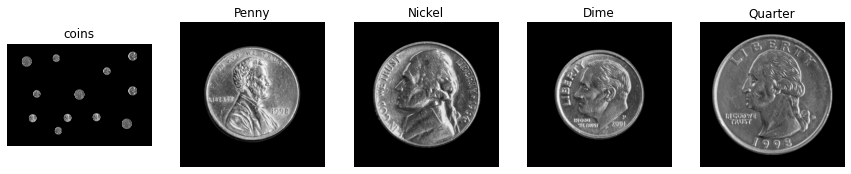

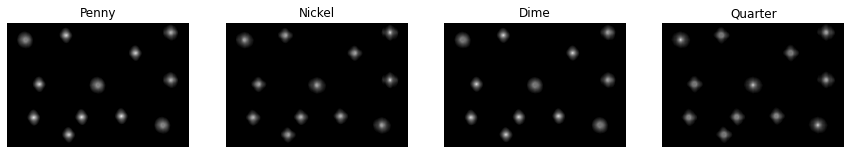

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

coins = cv.imread('D:\semester 5\EN3160\images\coins\coins.png', cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread('D:\semester 5\EN3160\images\coins\Penny.png', cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread('D:\\semester 5\\EN3160\\images\\coins\\Nickel.png', cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread('D:\semester 5\EN3160\images\coins\Dime.png', cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread('D:\semester 5\EN3160\images\coins\Quarter.png', cv.IMREAD_GRAYSCALE)
assert q is not None


#Display the images
plt.figure(figsize=(15,15))
plt.subplot(1,5,1)
plt.imshow(coins, cmap='gray')
plt.title('coins')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(p, cmap='gray')
plt.title('Penny')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(n, cmap='gray')
plt.title('Nickel')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(d, cmap='gray')
plt.title('Dime')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(q, cmap='gray')
plt.title('Quarter')
plt.axis('off')


p_resp = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
n_resp = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_resp = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_resp = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)


plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(p_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Penny')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(n_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Nickel')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(d_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Dime')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(q_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Quarter')
plt.axis('off')



Find location of the penny : highest intensity in horizontal and vertical direction - need to do an argmax
<br>
Do an arg max not only in the spatial direction(x,y diection) but also stacking up all images(axis of the coin names) - peak_local_max , from skimage.feature

In [2]:
# Vertically stack the responses along a new axis
stacked = np.stack([p_resp, n_resp, d_resp, q_resp], axis=2)

#This function stacks the four response arrays (p_resp, n_resp, d_resp, q_resp) along a new third dimension (the depth of the array).

#After stacking, the stacked array will have a shape of (height, width, 4), where the third dimension corresponds to the responses for each template.
    
#This allows you to analyze all response maps simultaneously and is useful for finding local maxima across all templates.

In [3]:
stacked.shape

(2181, 3209, 4)

In [4]:
from skimage.feature import peak_local_max
import numpy as np
import cv2 as cv

template_names = ["Penny", "Nickel", "Dime", "Quarter"]

pastel_colors = [
    (255, 182, 193),  # Pastel Pink
    (173, 216, 230),  # Pastel Blue
    (119, 221, 119),  # Pastel Green
    (253, 253, 150)  # Pastel Yellow
 ]

# Make a color image to draw on
coins_color = cv.cvtColor(coins, cv.COLOR_GRAY2BGR)

# Find local maxima
coordinates = peak_local_max(stacked, exclude_border=0, min_distance=5, threshold_abs=0.2)
# This function identifies local maxima in the stacked response array.
# It searches for points in the stacked array where the value is greater than its neighbors, indicating a peak.
# exclude_border=0: Specifies that no border pixels should be excluded from the search for maxima.
# min_distance=5: Ensures that detected maxima are at least 5 pixels apart. This helps avoid detecting multiple close peaks for the same object.
# threshold_abs=0.2: Sets a minimum threshold value for considering a peak as valid. Only maxima with a value greater than 0.2 will be considered. This is useful for filtering out weak detections that might be noise.

# The function returns coordinates, which is an array of (y, x, c) coordinates. Here:
# y and x correspond to the pixel positions in the image.
# c indicates which template matched best (penny, nickel, etc.).
print(coordinates)



[[ 166 2892    1]
 [1002 2892    1]
 [1074  572    2]
 [1638 2016    0]
 [1962 1092    2]
 [1654 1316    0]
 [1662  472    0]
 [ 214 1044    2]
 [ 294  328    3]
 [ 526 2268    2]
 [1090 1604    3]
 [1794 2748    3]]


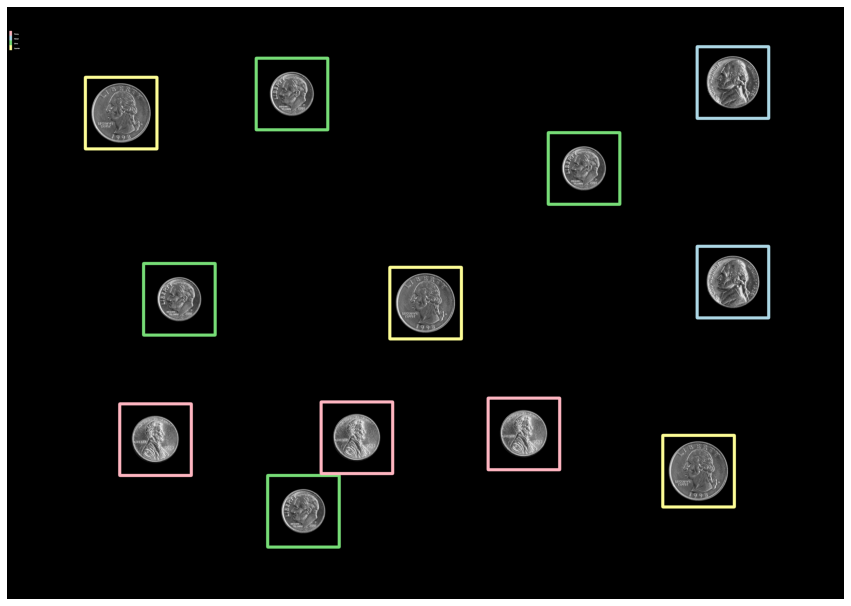

In [5]:
# Make a color image to draw on 
coins_color = cv.cvtColor(coins, cv.COLOR_GRAY2BGR)

# Plot rectangles around detected coins
for coord in coordinates:
    y, x, c = coord
    # Get the shape of the template corresponding to the detected coin
    template_shape = [p.shape, n.shape, d.shape, q.shape][c]
    
    # Calculate the bottom right corner of the rectangle
    bottom_right = (x + template_shape[1], y + template_shape[0])
    
    # Draw the rectangle on the color image
    cv.rectangle(coins_color, (x, y), bottom_right, pastel_colors[c], thickness=12)

legend_scale = 0.6
rectangle_size = 100  # Width and height of the rectangles in pixels

# Calculate the total height occupied by the legend
legend_height = int(len(template_names) * rectangle_size * legend_scale)  # Adjusted legend height based on scale

# Calculate the starting y-coordinate to vertically center the legend
start_y = (coins_color.shape[0] - legend_height) // 2

# Create a legend
for i, (name, color) in enumerate(zip(template_names, pastel_colors)):
    # Define rectangle positions
    top_left = (10, 100 + 20 * i)
    bottom_right = (20, 120 + 20 * i)
    
    # Draw the rectangle for the legend
    cv.rectangle(coins_color, top_left, bottom_right, color, thickness=-1)
    
    # Define text position
    text_position = (30, 115 + 20 * i)
    
    # Draw the text for the legend
    cv.putText(coins_color, name, text_position, cv.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), thickness=1, lineType=cv.LINE_AA)


plt.figure(figsize=(15,15))
plt.imshow(X=coins_color)
plt.axis("off")
plt.show()


In [6]:
template_dict = {index: name for index, name in enumerate(template_names)}

print(template_dict)

{0: 'Penny', 1: 'Nickel', 2: 'Dime', 3: 'Quarter'}


In [7]:
import numpy as np

# Count classes using numpy
def count_classes(array):
    class_labels = array[:, 2]  # Extract the class labels (third column)
    
    unique, counts = np.unique(class_labels, return_counts=True)  # Count occurrences of each label
    return dict(zip(unique, counts))  # Create a dictionary from unique labels and their counts

# Get counts of classes
result = count_classes(coordinates)
print(result)


{0: 3, 1: 2, 2: 4, 3: 3}


In [9]:
coins_count = {}

# key is the label_name, value is the count
for key, value in result.items():
  coins_count[template_dict[key]] = value
  
print(coins_count)

{'Penny': 3, 'Nickel': 2, 'Dime': 4, 'Quarter': 3}


In [10]:
# Amount of money represented in the image
def calculate_total_amount(coins_dict):
    # Define the value of each coin in cents
    coin_values = {
        'Penny': 1,
        'Nickel': 5,
        'Dime': 10,
        'Quarter': 25
    }
    
    # Calculate total amount using a loop
    total_amount = sum(count * coin_values.get(coin, 0) for coin, count in coins_dict.items())
    
    # Convert total_amount from cents to dollars
    total_amount_dollars = total_amount / 100.0
    
    return total_amount_dollars

# Calculate total amount
total_amount = calculate_total_amount(coins_count)
print(f'Total amount: ${total_amount:.2f}')



Total amount: $1.28


**Assumptions made when detecting coins**
<br>
<br>

* Only consider all the coins have a higher peak than 0.8
<br>

* All the coins have atleast 5 pixels apart from each other.
<br> 

* All the pixels have been considered to detect the image.(Including border pixels)